# 1.4.12 Template Matching

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('./img/soccer/game_3.png',0)
img2 = img.copy()
template = cv2.imread('./img/soccer/template.png',0)

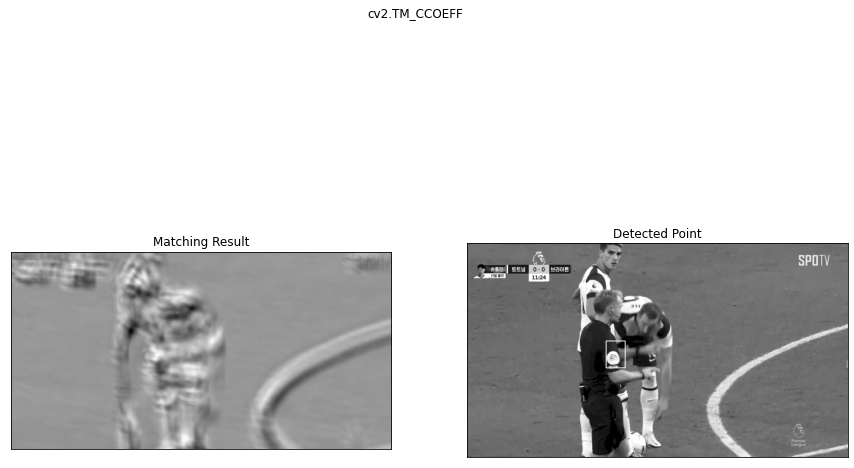

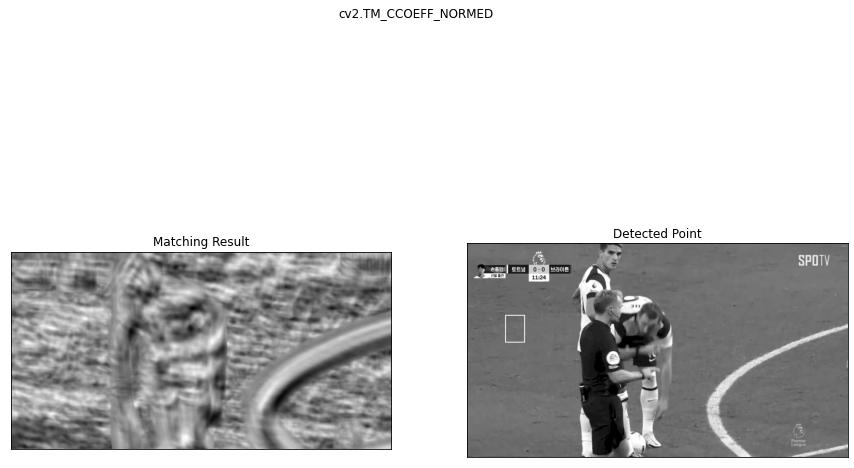

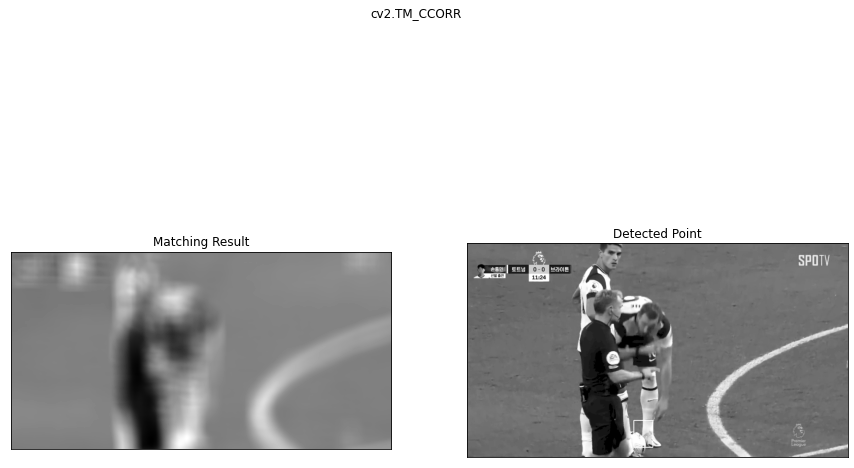

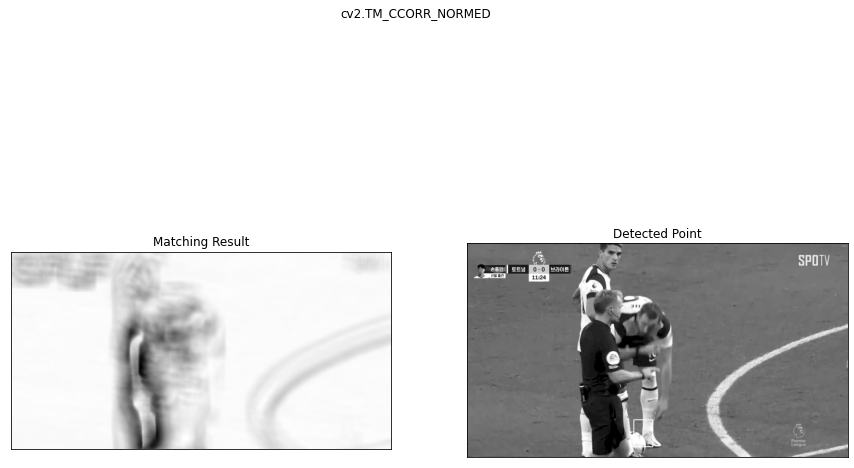

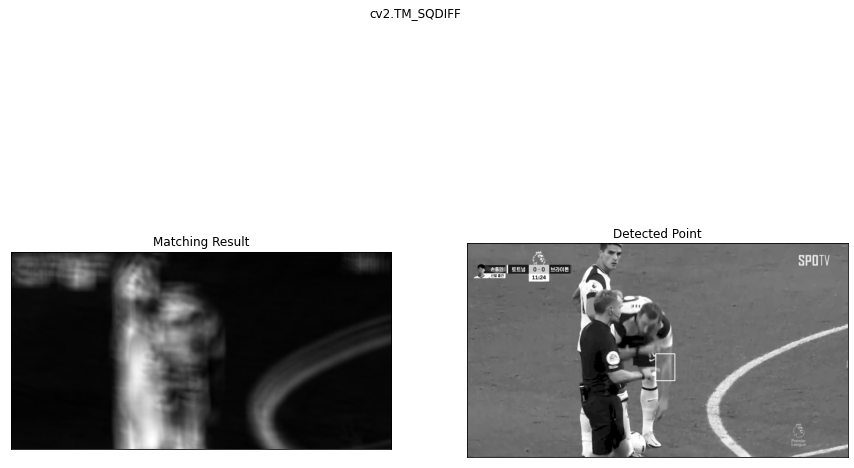

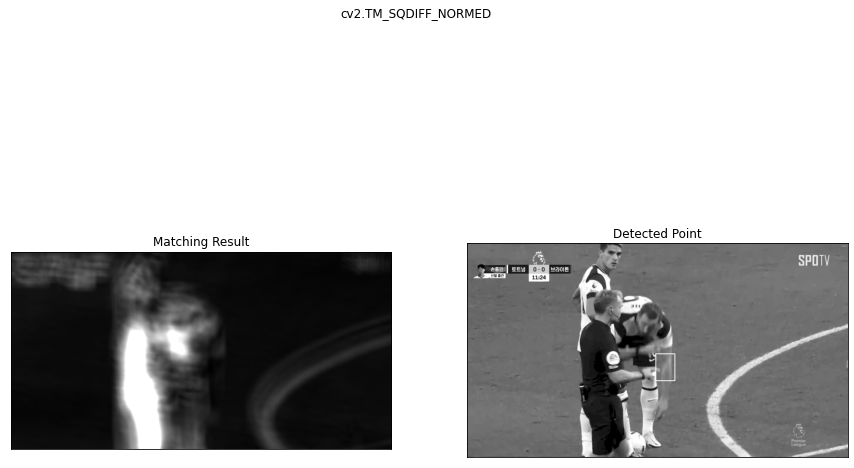

In [15]:
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    
    plt.figure(figsize=(15,10))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    
    plt.show()

## Template Matching with Multiple Objects

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [26]:
img_rgb = cv2.imread('./img/mario/coins_map_2.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('./img/mario/coins_2.png',0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.6
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

cv2.imwrite('res_2.png',img_rgb)

True

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
img_rgb = cv2.imread('./img/soccer/game_1.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('./img/soccer/template.png',0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.6
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

cv2.imwrite('soccerplayer.png',img_rgb)

True

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [10]:
img_rgb = cv2.imread('./img/mario/coins_map_2.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('./img/mario/coins_2.png',0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.6
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

cv2.imwrite('./img/result/coin_result.png',img_rgb)

True

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [12]:
img_rgb = cv2.imread('./img/mario/coins_map_2.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('./img/mario/coins_2.png',0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
print(min_val, max_val, min_loc, max_loc)

-0.5856967568397522 0.7031609416007996 (775, 721) (1070, 697)


In [13]:
res=(res-min_val)/(max_val-min_val)
print(res)

[[0.4544309  0.4544309  0.4544309  ... 0.4544309  0.4544309  0.4544309 ]
 [0.4544309  0.4544309  0.4544309  ... 0.4544309  0.4544309  0.4544309 ]
 [0.4544309  0.4544309  0.4544309  ... 0.4544309  0.4544309  0.4544309 ]
 ...
 [0.45213118 0.4433463  0.43645614 ... 0.5306268  0.542953   0.5553341 ]
 [0.45565355 0.44739774 0.44118157 ... 0.5262537  0.53833133 0.55038977]
 [0.45856863 0.4508194  0.4451892  ... 0.52320665 0.5348864  0.54648525]]


In [28]:
threshold = 0.9
loc = np.where(res >= threshold)

In [29]:
print(loc[::-1])

(array([ 587,  588,  589, ...,  829,  949, 1070], dtype=int64), array([319, 319, 319, ..., 704, 704, 704], dtype=int64))


In [30]:
img_rgb = cv2.imread('./img/mario/coins_map_2.png') #mario hmson2
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,0,255), 1)

In [31]:
cv2.imshow('dst', img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()